Importing PermaModel packages:
   permamodel.utils
   permamodel.components
 
 
Ku model component: Initializing...
initialized
Total grids = 8 
Permafrost component: Finished.
Running: 4.6 s
ALT_min = 0.481 m
ALT_avg = 0.580 m
ALT_max = 0.750 m
0.657142857143
0.579661843845


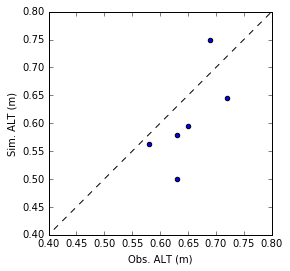

In [1]:
import sys
sys.path.append('../../permamodel/')

from time import clock
time_start = clock()
from permamodel.components import Ku_component 
x=Ku_component.Ku_method()

x.initialize('../permamodel/examples/Fairbanks_Ku_method_ts.cfg')
print x.initialize.im_self.status

import numpy as np
#print np.nanmean(x.lon)
#print np.nanmean(x.lat)
#print np.nanmean(x.T_air)
#print np.nanmean(x.A_air)TS
#print np.nanmean(x.h_snow)
#print np.nanmean(x.rho_snow)
#print np.nanmean(x.vwc_H2O)
#print np.nanmean(x.Hvgf)
#print np.nanmean(x.Hvgt)
#print np.nanmean(x.Dvf)
#print np.nanmean(x.Dvt)

print 'Total grids = {0:d} '.format(np.sum(~np.isnan(x.T_air)))

x.update()

x.finalize()

time_finish=clock()
    
print'Running: {0:0.1f} s'.format((time_finish-time_start))

print 'ALT_min = {0:0.3f} m'.format(np.nanmin(x.Zal))
print 'ALT_avg = {0:0.3f} m'.format(np.nanmean(x.Zal))
print 'ALT_max = {0:0.3f} m'.format(np.nanmax(x.Zal))

obs = np.loadtxt('DH_2008_2015.csv',delimiter=',')
obs = np.transpose(obs)
obs[np.where(obs<0)] = np.nan;
obs = obs/100;

print np.nanmean(obs)
print np.nanmean(x.Zal)

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

b = x.Zal[0]

plt.scatter(obs[0:6], b[0:6])

plt.plot(np.linspace(0, 1.1), np.linspace(0, 1.1),'k--')

ax.set_xlim((0.4, 0.8))
ax.set_ylim((0.4, 0.8))

plt.axes().set_aspect('equal')

ax.set_xlabel('Obs. ALT (m)')
ax.set_ylabel('Sim. ALT (m)')

In [2]:
print obs

[ 0.63  0.58  0.65  0.63  0.69  0.72  0.7    nan]


In [2]:
print np.corrcoef(obs[0:6],b[0:6])

[[ 1.          0.67487524]
 [ 0.67487524  1.        ]]


In [3]:
print x.deta_Tsn
print x.deta_Asn

[ 3.40090187  4.75698126  4.28494202  4.68149255  6.01904235  5.61296437
  3.98749287  3.21639476]
[ 2.16508138  3.02838833  2.72787881  2.98033072  3.83184137  3.5733241
  2.5385168   2.0476205 ]
